<a href="https://colab.research.google.com/github/spote210/GloVe-Embeddings/blob/main/Semantic_Projections_from_GloVe_Embeddings_3D_Visualization_of_Gender%2C_Age%2C_and_Royalty_Dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install matplotlib
!pip install scipy

In [8]:
%matplotlib inline

import os
import urllib.request

import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [9]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x7a66cbdafe50>)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!unzip '/content/glove.6B.zip' -d "/content/drive/My Drive/Colab Notebooks/Gen AI pilot"


Archive:  /content/glove.6B.zip
  inflating: /content/drive/My Drive/Colab Notebooks/Gen AI pilot/glove.6B.50d.txt  
  inflating: /content/drive/My Drive/Colab Notebooks/Gen AI pilot/glove.6B.100d.txt  
  inflating: /content/drive/My Drive/Colab Notebooks/Gen AI pilot/glove.6B.200d.txt  
  inflating: /content/drive/My Drive/Colab Notebooks/Gen AI pilot/glove.6B.300d.txt  


In [13]:
!rm 'glove.6B.zip'

In [15]:
embed_dict = {}
with open('/content/drive/My Drive/Colab Notebooks/Gen AI pilot/glove.6B.50d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], 'float32')
    embed_dict[word] = vector

In [19]:
values
word
vector
embed_dict[word]

array([ 0.072617, -0.51393 ,  0.4728  , -0.52202 , -0.35534 ,  0.34629 ,
        0.23211 ,  0.23096 ,  0.26694 ,  0.41028 ,  0.28031 ,  0.14107 ,
       -0.30212 , -0.21095 , -0.10875 , -0.33659 , -0.46313 , -0.40999 ,
        0.32764 ,  0.47401 , -0.43449 ,  0.19959 , -0.55808 , -0.34077 ,
        0.078477,  0.62823 ,  0.17161 , -0.34454 , -0.2066  ,  0.1323  ,
       -1.8076  , -0.38851 ,  0.37654 , -0.50422 , -0.012446,  0.046182,
        0.70028 , -0.010573, -0.83629 , -0.24698 ,  0.6888  , -0.17986 ,
       -0.066569, -0.48044 , -0.55946 , -0.27594 ,  0.056072, -0.18907 ,
       -0.59021 ,  0.55559 ], dtype=float32)

In [20]:
print('King:',embed_dict['king'])
print('Queen:',embed_dict['queen'])

King: [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
Queen: [ 0.37854    1.8233    -1.2648    -0.1043     0.35829    0.60029
 -0.17538    0.83767   -0.056798  -0.75795    0.22681    0.98587
  0.60587   -0.31419    0.28877    0.56013   -0.77456    0.071421
 -0.5741     0.21342    0.57674    0.3868    -0.12574    0.28012
  0.28135   -1.8053    -1.0421    -0.19255   -0.55375   -0.054526
  1.5574     0.39296   -0.2475     0.34251    0.45365    0.16237
  0.52464   -0.070272  -0.83744   -1.0326     0.45946    0.25302
 -0.17837   -0.73398   -0.20025

In [22]:
def find_similar_words(embedes):
  nearest = sorted(embed_dict.keys(), key=lambda word: spatial.distance.euclidean(embed_dict[word], embedes))
  return nearest

In [23]:
find_similar_words(embed_dict['river'])[0:10]

['river',
 'rivers',
 'creek',
 'valley',
 'tributary',
 'basin',
 'flows',
 'tributaries',
 'lake',
 'confluence']

In [24]:
find_similar_words(embed_dict['king'] + embed_dict['queen'] + embed_dict['prince'])[0:10]

['king',
 'prince',
 'queen',
 'throne',
 'princess',
 'son',
 'emperor',
 'royal',
 'daughter',
 'father']

t-SNE [1] is a tool to visualize high-dimensional data.

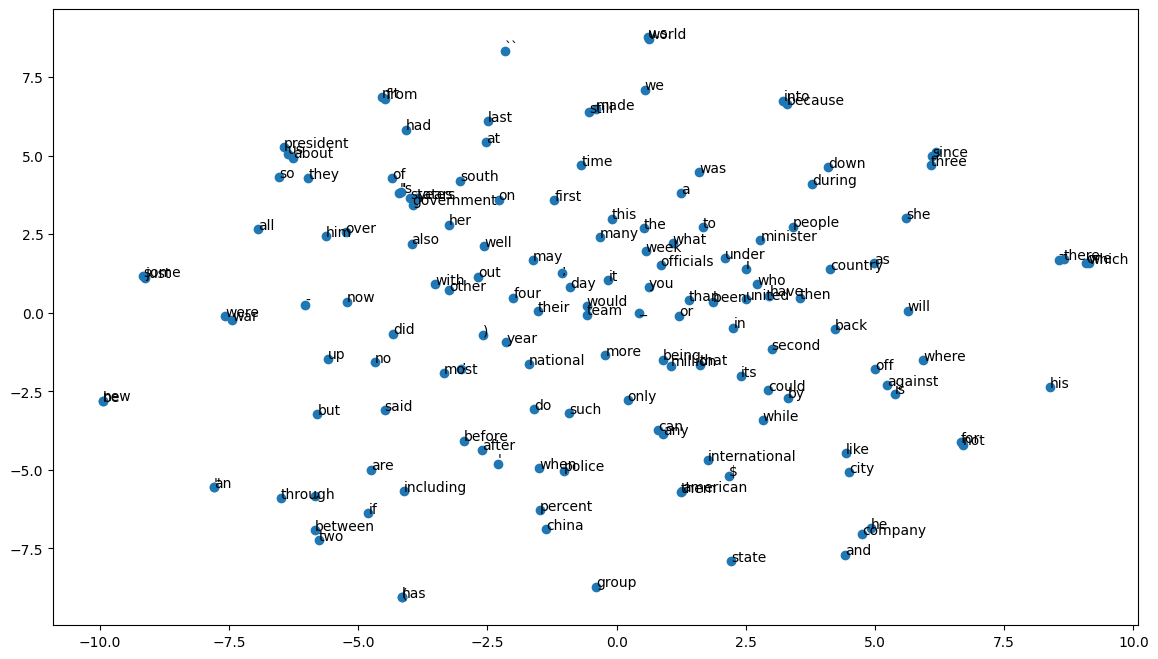

In [25]:
distri = TSNE(n_components=2)
words = list(embed_dict.keys())
vectors = np.asanyarray([embed_dict[word] for word in words])  # convert vectors to numpy array
y = distri.fit_transform(vectors[700:850])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])

for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()

In [27]:
vec_age = embed_dict['age']
vec_grandfather = embed_dict['grandfather']

1. Cosine Similarity

In [28]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

cos_sim = cosine_similarity(vec_age, vec_grandfather)
print("Cosine Similarity:", cos_sim)

Cosine Similarity: 0.5291977


2. Euclidean Distance (lower distance = more similar)

In [29]:
from scipy.spatial.distance import euclidean

euc_dist = euclidean(vec_age, vec_grandfather)
print("Euclidean Distance:", euc_dist)

Euclidean Distance: 4.804211616516113


3. Manhattan (L1) Distance

In [30]:
from scipy.spatial.distance import cityblock

manhattan_dist = cityblock(vec_age, vec_grandfather)
print("Manhattan Distance:", manhattan_dist)


Manhattan Distance: 26.22458


In [33]:
import pandas as pd

gender_axis = embed_dict['woman'] - embed_dict['man']
age_axis = embed_dict['man'] - embed_dict['boy']
royalty_axis = embed_dict['king'] - embed_dict['man']

words = ['grandfather', 'man', 'woman', 'boy', 'girl', 'king',
         'monarch', 'queen', 'prince', 'princess', 'child', 'infant']


results = []
for word in words:
    vec = embed_dict.get(word)
    if vec is not None:
        gender = cosine_similarity(vec, gender_axis)
        age = cosine_similarity(vec, age_axis)
        royalty = cosine_similarity(vec, royalty_axis)
        results.append([word, round(gender, 2), round(age, 2), round(royalty, 2)])
    else:
        results.append([word, None, None, None])  # handle missing

# --- Step 5: Display table ---
df = pd.DataFrame(results, columns=['Word', 'Gender', 'Age', 'Royalty'])
print(df)

           Word  Gender   Age  Royalty
0   grandfather    0.02  0.06     0.08
1           man   -0.12  0.27    -0.46
2         woman    0.36  0.05    -0.47
3           boy    0.12 -0.27    -0.39
4          girl    0.35 -0.26    -0.43
5          king   -0.19  0.13     0.50
6       monarch    0.05  0.16     0.34
7         queen    0.20 -0.02     0.27
8        prince   -0.08  0.29     0.34
9      princess    0.35 -0.07     0.18
10        child    0.31 -0.13    -0.29
11       infant    0.40 -0.23    -0.17


In [36]:
import plotly.express as px
import pandas as pd
import numpy as np

# Sample DataFrame from earlier steps
df = pd.DataFrame(results, columns=['Word', 'Gender', 'Age', 'Royalty'])

fig = px.scatter_3d(df, x='Gender', y='Age', z='Royalty',
                    text='Word', color='Word',
                    title='3D Semantic Projection (GloVe): Gender vs Age vs Royalty')

# Show word labels
fig.update_traces(marker=dict(size=5), textposition='top center')

# Improve layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))

fig.show()


In [37]:
import pandas as pd

gender_axis = embed_dict['woman'] - embed_dict['man']
age_axis = embed_dict['man'] - embed_dict['boy']
royalty_axis = embed_dict['king'] - embed_dict['man']

words = ['grandfather', 'man', 'woman', 'boy', 'girl', 'king',
         'monarch', 'queen', 'prince', 'princess', 'child', 'infant']


results = []
for word in words:
    vec = embed_dict.get(word)
    if vec is not None:
        gender = euclidean(vec, gender_axis)
        age = euclidean(vec, age_axis)
        royalty = euclidean(vec, royalty_axis)
        results.append([word, round(gender, 2), round(age, 2), round(royalty, 2)])
    else:
        results.append([word, None, None, None])  # handle missing

# --- Step 5: Display table ---
df = pd.DataFrame(results, columns=['Word', 'Gender', 'Age', 'Royalty'])
print(df)

           Word  Gender   Age  Royalty
0   grandfather    5.13  5.15     6.54
1           man    6.12  5.24     8.89
2         woman    5.24  6.12     9.20
3           boy    5.58  6.57     8.66
4          girl    5.35  6.95     9.15
5          king    6.40  5.74     5.24
6       monarch    5.37  5.17     5.75
7         queen    5.31  5.95     6.24
8        prince    5.90  5.05     5.86
9      princess    5.39  6.53     6.97
10        child    5.23  6.41     8.50
11       infant    4.42  6.07     7.60


In [38]:
import plotly.express as px
import pandas as pd
import numpy as np

# Sample DataFrame from earlier steps
df = pd.DataFrame(results, columns=['Word', 'Gender', 'Age', 'Royalty'])

fig = px.scatter_3d(df, x='Gender', y='Age', z='Royalty',
                    text='Word', color='Word',
                    title='3D Semantic Projection (GloVe): Gender vs Age vs Royalty')

# Show word labels
fig.update_traces(marker=dict(size=5), textposition='top center')

# Improve layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))

fig.show()